# Import Libraries:

In [31]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import random as rd

# Reading Iris data
First we read the data from the dataset using read_csv from the pandas library.

In [32]:
dataset=pd.read_csv('iris.csv')

# Data Exploration
Now we view the Head and Tail of the data using head() and tail() respectively.

In [33]:
dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [34]:
dataset.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


Assign columns to the dataset

In [35]:

columns_value = ['sepal length (cm)',	'sepal width (cm)'	,'petal length (cm)',	'petal width (cm)','target']
dataset = dataset.values
dataset = pd.DataFrame(dataset,columns=columns_value)

Convert object datatype to float

In [36]:
dataset ['sepal length (cm)'] = dataset ['sepal length (cm)'].astype(np.float64)
dataset ['sepal width (cm)'] = dataset ['sepal width (cm)'].astype(np.float64)
dataset ['petal length (cm)'] = dataset ['petal length (cm)'].astype(np.float64)
dataset ['petal width (cm)'] = dataset ['petal width (cm)'].astype(np.float64)

Show the categories in the target variable

In [37]:
dataset['target'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: target, dtype: int64

Correlation of the data

In [38]:
dataset.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.103784,0.871283,0.816971
sepal width (cm),-0.103784,1.000000,-0.415218,-0.350733
petal length (cm),0.871283,-0.415218,1.000000,0.962314
petal width (cm),0.816971,-0.350733,0.962314,1.000000


EDA

<AxesSubplot:>

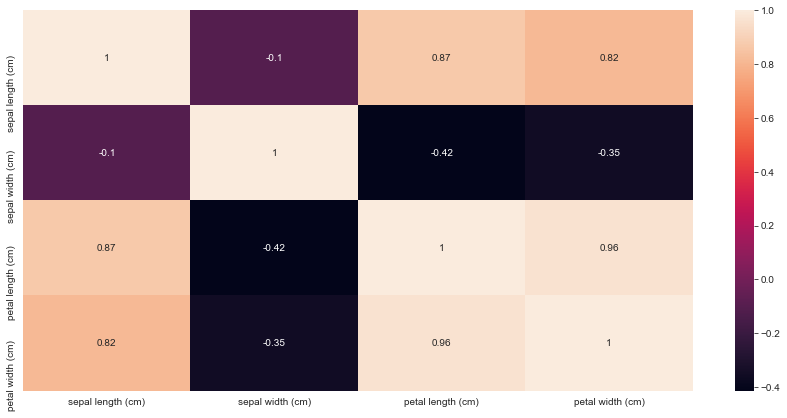

In [39]:
plt.figure(figsize=(15,7)) # heatmap
sns.heatmap(dataset.corr(),annot=True)

Visualize the data before clustered

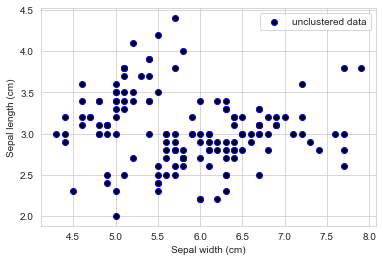

In [40]:
beforeClustered= np.array(dataset)
plt.xlabel('Sepal width (cm)')
plt.ylabel('Sepal length (cm)')
plt.scatter(
beforeClustered[:,0],
beforeClustered[:,1],
c='black',
cmap='Dark2',
edgecolors='b',
label='unclustered data'
)
plt.legend()
plt.show()

C:\Users\Sinte\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


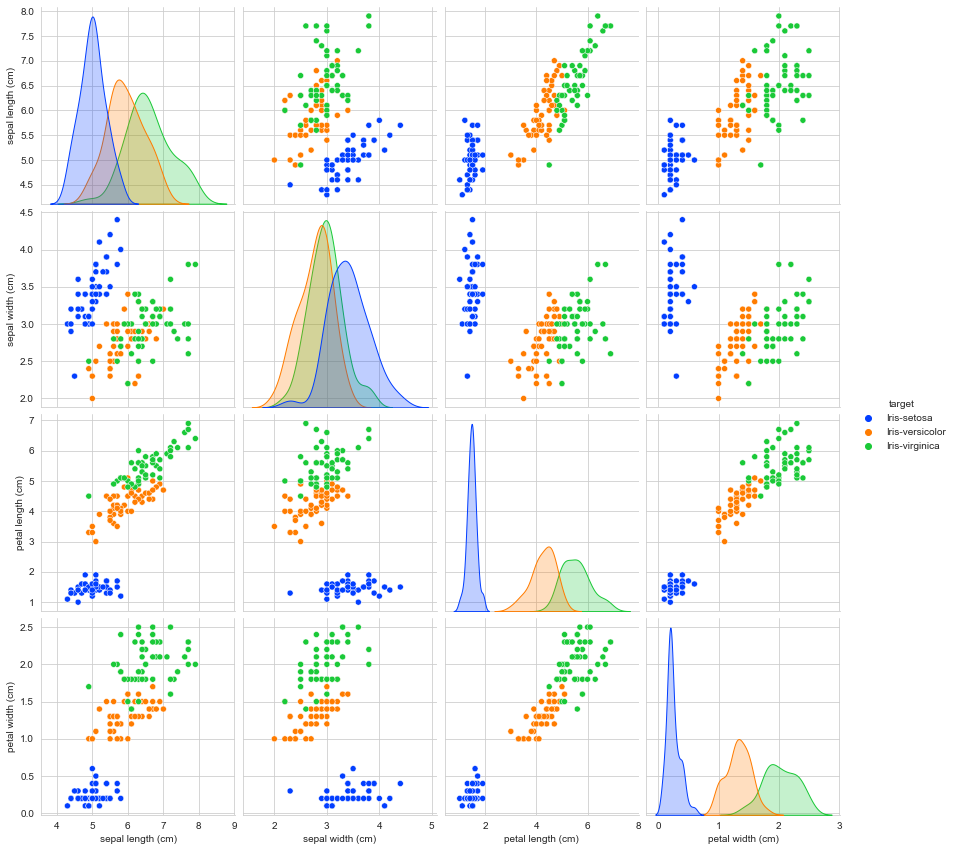

In [41]:
sns.pairplot(dataset,hue="target",palette="bright",diag_kind="auto",size=3) #to visualise all the attributes dependency on each other
sns.set_style("whitegrid");

# Data preparation
Here we have the target variable ‘target’. We need to remove the target variable so that this dataset can be used to work in an unsupervised learning environment.

In [42]:
# Convert the 'target' feature to a numerical one and store the labels into a variable y  

y = dataset['target'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
y = np.array(y)
# store the iris data in X
X = dataset.drop('target', axis=1)

# X = dataset.iloc[:,:4]


In [43]:
print(X.shape)
print(y.shape)

(149, 4)
(149,)


Normalize the dataset

In [44]:
X  = ((X - X.mean()) / (X.std()))

# Implementation of Clustering Algorithms

The iloc function is used to get the features we require. We also use '.values' function to get an array of the dataset. 


In [45]:
X=X.iloc[:,:4].values

Choose the number of iterations which might guarantee convergence.Assign number of training data to m and number of features to n.

In [46]:
m=X.shape[0] #number of training data,
n=X.shape[1] #number of features.
n_iter=300

### KMeans++ algorithm, for initialization of the centroids
Steps involved in Kmeans++ initialization are:
1. Randomly select the first cluster center from the data points and append it to the centroid matrix.
2. Loop over the number of Centroids that need to be chosen (K):
3. For each data point calculate the euclidian distance square from already chosen centroids and append the minimum distance to a Distance array.
4. Calculate the probabilities of choosing the particular data point as the next centroid by dividing the Distance array elements with the sum of Distance array. Let’s call this probability distribution as PD.
5. Calculate the cumulative probability distribution from this PD distribution. We knew that the cumulative probability distribution ranges from 0 to 1.
6. Select a random number between 0 to 1, get the index (i) of the cumulative probability distribution which is just greater than the chosen random number and assign the data point corresponding to the selected index (i).
7. Repeat the process until we have K number of cluster centers.

In [47]:
def initializeCentroids(X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T

### K-means clustering algorithm
The K-means clustering is another class of unsupervised learning algorithms used to find out the clusters of data in a given dataset.
The 5 Steps in K-means Clustering Algorithm
1. Randomly initialize the cluster centers of each cluster from the data points.
2. For each data point, compute the euclidian distance from all the centroids and assign the cluster based on the minimal distance to all the centroids. 
3. Adjust the centroid of each cluster by taking the average of all the data points which belong to that cluster on the basis of the computations performed in step 2. 
4. Repeat the Steps 2 to 3 till clusters are well separated or convergence is achieved.


In [48]:
def kmeans(X,K):
   
    #randomly Initialize the centroids 
    Centroids=initializeCentroids(X,K)       
    Output={}     
    #compute euclidian distances and assign clusters
    for i in range(n_iter):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1) # NumPy broadcasting
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
        Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(n,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]
        
        for k in range(K):
            Y[k+1]=Y[k+1].T
        for k in range(K):
            Centroids[:,k]=np.mean(Y[k+1],axis=0)                
        Output=Y
   
    return Output,Centroids.T 

Compute cluster centers and predict cluster index for each sample.

In [49]:
def fit_predict(X, Centroids):
    Centroids = Centroids.T
    EuclidianDistance=np.array([]).reshape(X.shape[0],0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)
    return C

# Model Buliding
### ELBOW method to find the appropriate number of clusters

The parameter which will be taken into consideration is Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares).
Steps involved in ELBOW method are:
1. Perform K means clustering on different values of K ranging from 1 to any upper limit. Here we are taking the upper limit as 10.
2. For each K, calculate WCSS
3. Plot the value for WCSS with the number of clusters K.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. i.e the point after which WCSS doesn’t decrease more rapidly is the appropriate value of K.

In [50]:
#to find optimum number of clusters use elbow method
WCSS_array=np.array([])
for K in range(1,11):
    Output,Centroids=kmeans(X,K) 
   
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
    WCSS_array=np.append(WCSS_array,wcss)

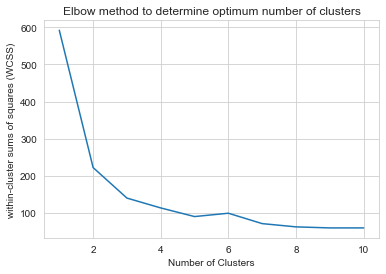

In [51]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

We can clearly see why it is called "the elbow mehtod" from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. In the above graph, there is no bend after the 3rd cluster, hence, 3 is the optimum number of clusters, i.e, k=3 

### Applying KMeans to the dataset

In [52]:
K=3

In [53]:
Output,Centroids=kmeans(X,K)

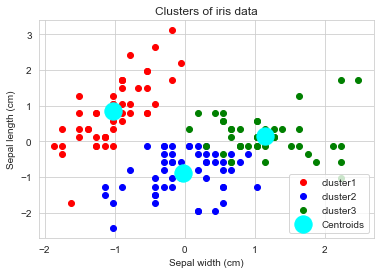

In [54]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='cyan',label='Centroids')
plt.title('Clusters of iris data')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Sepal length (cm)')
plt.legend()
plt.show()

### Comparing Actual and Predicted values

In [55]:
# Compute cluster centers and predict cluster index for each sample.
y_kmeans = fit_predict(X,Centroids)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

Text(0.5, 1.0, 'Predicted')

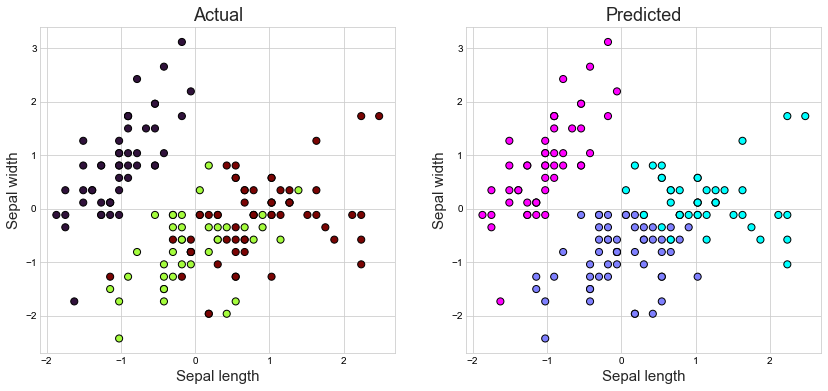

In [56]:
# Plot the identified clusters and compare with the answers
sns.set_style("whitegrid");
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='turbo', edgecolor='k', s=50)
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='cool_r', edgecolor='k', s=50)
axes[0].set_xlabel('Sepal length', fontsize=15)
axes[0].set_ylabel('Sepal width', fontsize=15)
axes[1].set_xlabel('Sepal length', fontsize=15)
axes[1].set_ylabel('Sepal width', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# Finally, let’s implement all these steps using the sklearn library so that we can compare the results:

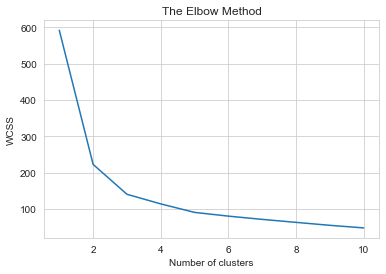

In [57]:
#lets implement the same algorithm using sklearn libraries
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_bulitin = kmeans.fit_predict(X)
y_kmeans_bulitin

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

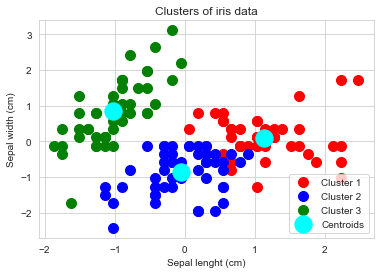

In [59]:
# Visualising the clusters
plt.scatter(X[y_kmeans_bulitin == 0, 0], X[y_kmeans_bulitin == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_bulitin == 1, 0], X[y_kmeans_bulitin == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_bulitin == 2, 0], X[y_kmeans_bulitin == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'cyan', label = 'Centroids')
plt.title('Clusters of iris data')
plt.xlabel('Sepal lenght (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Predicted')

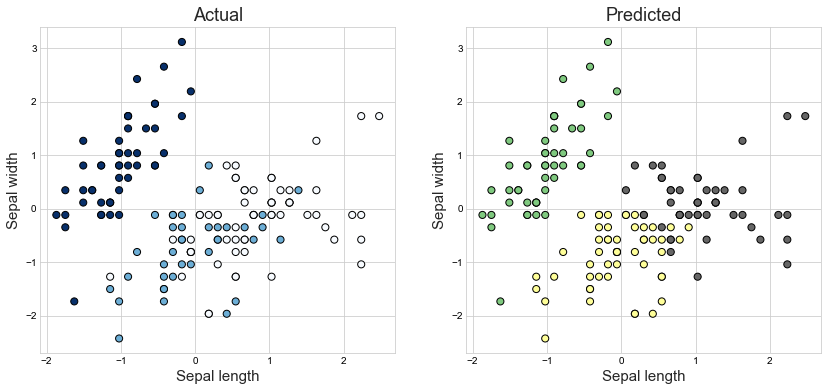

In [60]:
# Plot the identified clusters and compare with the answers
sns.set_style("whitegrid");
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='Blues_r', edgecolor='k', s=50)
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans_bulitin, cmap='Accent_r', edgecolor='k', s=50)
axes[0].set_xlabel('Sepal length', fontsize=15)
axes[0].set_ylabel('Sepal width', fontsize=15)
axes[1].set_xlabel('Sepal length', fontsize=15)
axes[1].set_ylabel('Sepal width', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


# We have learned 
* K-means Clustering from scratch and implemented the algorithm in python.
* Solved the problem of choosing the number of clusters based on the Elbow method.
* Solved the problem of random initialization using KMeans++ algorithm.
* Solved the problem of cluster centers and predict cluster index for each sample.